## Домашнее задание №3 (курс "Практикум по программированию на языке Python")

### Тема: Основы анализа данных и машинного обучения в Python.

#### Преподаватель: Мурат Апишев (mel-lain@yandex.ru)

**Выдана**:   14 апреля 2021

**Дедлайн**:   21:00 28 апреля 2021

**Среда выполнения**: Jupyter Notebook (Python 3.7)

#### Правила:

Результат выполнения задания - Jupyter Notebook с кодом и подробными ответами в случае теоретических вопросов. __Максимальное число баллов за задание - 20__.

Все ячейки должны быть "выполненными", при этом результат должен воспроизводиться при проверке (на Python 3.7). Если какой-то код не был запущен или отрабатывает с ошибками, то пункт не засчитывается. Задание, сданное после дедлайна, _не принимается_. Можно отправить недоделанное задание, выполненные пункты будут оценены.

Готовое задание отправляется на почту преподавателя.

Задание выполняется самостоятельно. Если какие-то студенты будут уличены в списывании, все они автоматически получат за эту работу 0 баллов. Если вы нашли в Интернете какой-то специфичный код, который собираетесь заимствовать, обязательно укажите это в задании - наверняка вы не единственный, кто найдёт и использует эту информацию.

Удалять фрагменты формулировок заданий запрещается.

#### Постановка задачи:

- В данной работе нужно решить ряд задач c использованием библиотек для обработки данных и машинного обучения, а также дать ичерпывающие ответы на поставленные вопросы.
- В задачах 1-3 запрещается использовать циклы, генераторы списков и списковые включения, а также функции высшего порядка, необходимо написать тесты, проверяющие работу решения в обычных и крайних случаях.
- Даже если это не указано явно в требованиях, код должен быть по возможности неизбыточным, работать с разумной сложностью и объёмом потребялемой памяти, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Результирующий код должен быть читаемым, с единой системой отступов и адеквантными названиями переменных, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Везде, где это требуется, должны быть отрисованы необходимые графики и даны комментарии и выводы.

In [1]:
import numpy as np
import re
from matplotlib import pyplot as plt
from matplotlib import cm


plt.rcParams["font.size"] = 14
SEED = 42

__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [2]:
def task_1(arr: np.ndarray):
    assert len(arr) > 0
    
    if isinstance(arr, list):
        arr = np.array(arr)
    
    return np.all(arr > 0)

Tests for `task_1` function

In [3]:
print(task_1(np.zeros(10)) == False)
print(task_1(np.ones(10)) == True)
print(task_1([1, 2, 5, 3]) == True)
print(task_1([1, 7, -1]) == False)
print(task_1([[[[2]]]]) == True)

try:
    task_1([])
except AssertionError:
    print("OK")

True
True
True
True
True
OK


__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [4]:
def task_2(arr: np.ndarray, n: int):
    if n < 0:
        raise ValueError("n should be positive")
        
    return np.repeat(arr, n)

Tests for `task_2` function

In [5]:
arr1 = [1, 2, 3]
arr2 = [0]
arr3 = [[2, 1], [0, -1]]

print(all(task_2(arr1, 0) == []))
print(all(task_2(arr1, 1) == arr1))
print(all(task_2(arr1, 3) == [1, 1, 1, 2, 2, 2, 3, 3, 3]))
print(all(task_2(arr2, 5) == np.zeros(5)))
print(all(task_2(arr3, 2) == [2, 2, 1, 1, 0, 0, -1, -1]))

try:
    task_2(arr1, -1)
except ValueError:
    print("OK")

True
True
True
True
True
OK


__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [6]:
def task_3(V: np.ndarray, v: np.ndarray):
    if type(v) != np.ndarray:
        v = np.array(v)
        
    if type(V) != np.ndarray:
        V = np.array(V)
        
    if V.ndim != 1 or v.ndim != 1:
        raise ValueError("V.ndim != 1 or v.ndim != 1")
        
    if np.sum(v) > V.size:
        raise ValueError("V array is short")
        
    cum_ind = np.cumsum(v) - 1
    cum_arr = np.cumsum(V)
    
    temp_sum = cum_arr[cum_ind]
    shifted_temp_sum = np.roll(temp_sum, 1)
    shifted_temp_sum[0] = 0
            
    return temp_sum - shifted_temp_sum

Tests for `task_3` function

In [7]:
arr1 = np.arange(1, 11).tolist()
arr2 = [2, 1, 3]
arr3 = [4, 2, 3, 1]
arr4 = [5, 7]
arr5 = [[3, 12], [1, -1]]
arr6 = [1, 1, 1, 1, 1, 1]
arr7 = [3, 0, 3]

print(all(task_3(arr1, arr2) == [3, 3, 15]))
print(all(task_3(arr1, arr3) == [10, 11, 24, 10]))
print(all(task_3(arr1, arr6) == [1, 2, 3, 4, 5, 6]))
print(all(task_3(arr6, arr2) == arr2))
print(all(task_3(arr6, arr7) == arr7))

try:
    task_3(arr1, arr4)
except ValueError:
    print("OK")
    
try:
    task_3(arr5, arr1)
except ValueError:
    print("OK")
    
try:
    task_3(arr4, arr5)
except ValueError:
    print("OK")


True
True
True
True
True
OK
OK
OK


Для решения следующих заданий скачайте набор данных 20 News Group с помощью следующего кода:

In [8]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')

label_names = pd.DataFrame(columns=['label_id', 'label_name'],
                           data=[(i, e) for i, e in enumerate(list(X_train.target_names))])
data = pd.DataFrame()
data['text'] = X_train.data + X_test.data
data['is_train'] = [True] * len(X_train.data) + [False] * len(X_test.data)
data['label_id'] = list(X_train.target) + list(X_test.target)

__Задание 4 (1.5 балла):__ Используя возможности библиотеки pandas

- сделайте join таблиц `data` и `label_names`, удалив из итоговой таблицы поле `label_id`
- посчитайте количество обучающих и тестовых данных
- постройте круговую диаграмму, показывающую долю каждого класса в обучающих данных

In [9]:
# Join `data` and `label_names`
labeled_data = data.merge(label_names, how="left", on="label_id")
labeled_data.drop(columns=["label_id"], inplace=True)
labeled_data.head()

,text,is_train,label_name
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,sci.space


In [10]:
# Count train and test dataset length
train_data = labeled_data.loc[labeled_data.is_train == True]
test_data = labeled_data.loc[labeled_data.is_train == False]

print("Train size:", train_data.shape[0])
print("Test size:", test_data.shape[0])

Train size: 11314
Test size: 7532


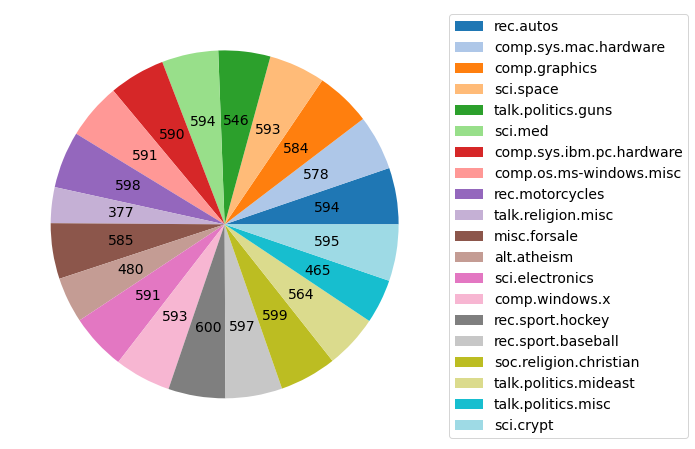

In [11]:
from collections import Counter


labels_counter = Counter(train_data.label_name)

cmap = cm.get_cmap("tab20")

def autopct_func(val):
    return round(val * sum(labels_counter.values()) / 100)

plt.figure(figsize=(15, 8))
plt.pie(labels_counter.values(), 
        labels=labels_counter.keys(), 
        autopct=autopct_func, 
        colors=cmap.colors, 
        labeldistance=None)

leg = plt.legend(loc='best')
leg.set_bbox_to_anchor((1, 1))
plt.show()

__Задание 5 (1.5 балла):__ Каждый объект представляет собой текст. Чаще всего тексты предобрабатывают перед тем, как пытаться выделять из них признаки. Опишите функцию `preprocess`, которая получает на вход сырой текст и возвращает предобработанный. Примените эту функцию к элементу `text` каждого объекта и результат запишите в столбец `pp_text` (далее под текстом подразумевается именно содержимое этого столбца). За пределами `preprocess` циклами пользоваться запрещено (т.е. предобработка должна применяться средствами DataFrame). Функция должна выполнять следующий набор операций:

- привести текст к нижнему регистру
- заменить все символы '\n', '\t' и '\r' на пробелы
- заменить в тексте все символы, не являющиеся английскими буквами, на пробелы
- сделать split текста по пробелам, удалив все пустые слова
- вернуть получившийся список слов

Для ускорения `preprocess` может использовать внешние переменные, например, скомпилированные регулярные выражения.

In [12]:
def preprocess(text):    
    modified_text = re.sub(r"[^a-zA-Z]", " ", text.lower())
    
    return " ".join(modified_text.split())
    
def task_5():
    labeled_data["pp_text"] = labeled_data.text.apply(preprocess)
    
task_5()

In [13]:
labeled_data.head()

,text,is_train,label_name,pp_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,rec.autos,from lerxst wam umd edu where s my thing subje...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,comp.sys.mac.hardware,from guykuo carson u washington edu guy kuo su...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,comp.sys.mac.hardware,from twillis ec ecn purdue edu thomas e willis...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,comp.graphics,from jgreen amber joe green subject re weitek ...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,sci.space,from jcm head cfa harvard edu jonathan mcdowel...


In [14]:
labeled_data.drop(columns=['text'], inplace=True)
train_data = labeled_data.loc[labeled_data.is_train == True]
test_data = labeled_data.loc[labeled_data.is_train == False]

__Задание 6 (2 балла):__ Каждое уникальное слово текста представляет собой признак. Посчитайте, сколько в обучающих текстах есть уникальных слов, отобразите гистограмму частот встречаемости слов в обучающей коллекции, 
отсортировав слова по убыванию частоты встречаемости (по оси X идут все слова из словаря коллекции в порядке убывания частоты встречаемости, по оси Y указываются значения частот).

Для уменьшения признакового пространства словарь фильтруют. Удалите из словаря

- все слова, встречающиеся более 9000-х раз
- все слова, встречающиеся менее 3-х раз
- все слова длиной менее 3 символов
- все слова длиной более 20 символов
- все слова, состоящие из одного и того же символа

Профильтруйте обучающую коллекцию по новому словарю и снова посчитайте число уникальных слов в словаре и снова постройте гистограмму частот.

In [15]:
MAX_FREQ = 9000
MIN_FREQ = 3
MIN_LENGTH = 3
MAX_LENGTH = 20

vocabulary = Counter()

def task_6():
    def filter_func(word):
        return MIN_LENGTH <= len(word) <= MAX_LENGTH and len(set(word)) > 1
    
    train_str = train_data.pp_text.str.cat(sep=" ")
    train_words = filter(filter_func, train_str.split())
    
    global vocabulary
    vocabulary.update(train_words)
    vocabulary = filter(lambda elem: MIN_FREQ <= elem[1] <= MAX_FREQ, 
                        vocabulary.items())
    vocabulary = Counter(dict(vocabulary))
    
task_6()

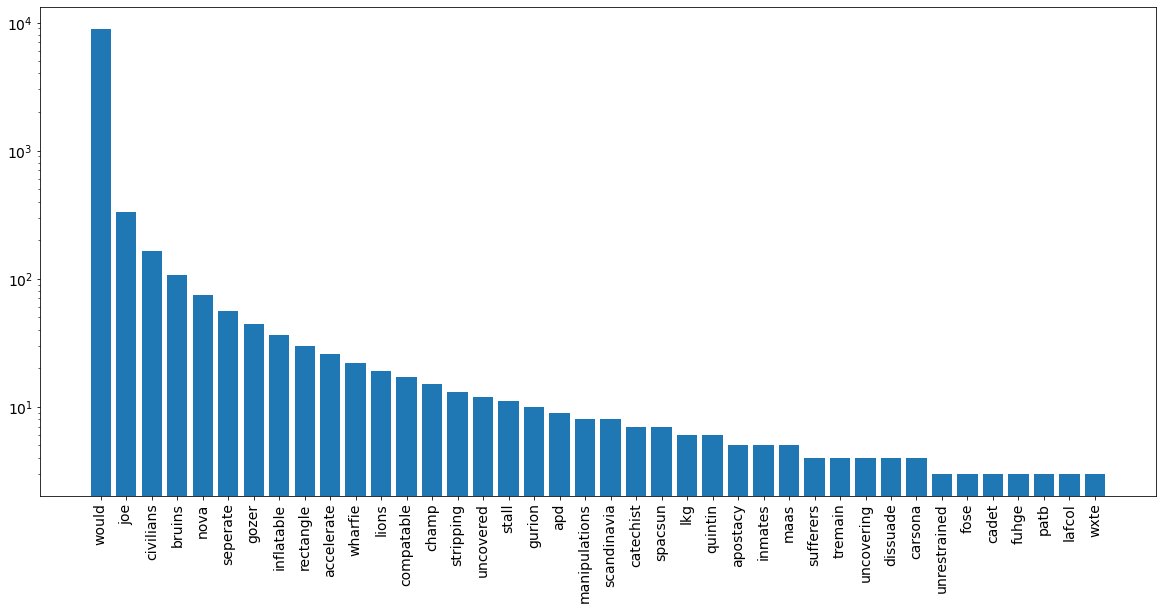

In [16]:
sorted_vocab = dict(vocabulary.most_common()[::1000])

plt.figure(figsize=(20, 9))
plt.bar(sorted_vocab.keys(), sorted_vocab.values())
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

__Задание 7 (2 балла):__ Для построения моделей данные нужно перевести в числовой вид. Для этого воспользуйтесь представлением "мешка слов", в котором признаками являются слова, а значениями - частоты их встречаемости в документе. Построить представление мешка слов можно с помощью класса CountVectorizer из sklearn. Подготовьте векторизатор, подав ему обучающие текстовые данные из `data` (приведите тексты к формату входа векторизатора) и полученный выше словарь.

Примените полученный векторизатор к обучающим и тестовым данным, на выходе должны получиться два numpy array (первая размерность - число объектов, вторая - число слов в словаре).

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

def task_7():
    vectorizer = CountVectorizer(vocabulary=vocabulary.keys())
    
    train_mat = vectorizer.fit_transform(train_data.pp_text.values)
    test_mat = vectorizer.fit_transform(test_data.pp_text.values)
    
    assert len(vectorizer.vocabulary_) == len(vocabulary)
    
    return train_mat, test_mat

train_mat, test_mat = task_7()

__Задание 8 (2 балла):__ Модель логистической регрессии хорошо работает для простых задач классификации текстов, примените её к полученным данным. Для этого настройте модель на обучающих данных, сделайте предсказание для тестовых и измерьте качество с помощью метрик accuracy и F1-score с микро- и макро-усреднением. Попробуйте подобрать оптимальное значение коэффициента регуляризации С с помощью GridSearchCV.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

def task_8():
    log_regr = LogisticRegression(max_iter=200, random_state=SEED)
    param_grid = {'C': [0.02, 0.1, 0.5, 2, 10, 50]}
    
    grid = GridSearchCV(log_regr, param_grid, scoring="accuracy", cv=3)
    grid.fit(train_mat, train_data.label_name)
    
    return grid

grid = task_8()

/home/eduard/anaconda3/envs/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/eduard/anaconda3/envs/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [23]:
preds = grid.predict(test_mat)

accuracy = round(accuracy_score(test_data.label_name, preds), 3)
f1_macro = round(f1_score(test_data.label_name, preds, average="macro"), 3)
f1_micro = round(f1_score(test_data.label_name, preds, average="micro"), 3)

print("Accuracy =", accuracy)
print("F1-score-macro =", f1_macro)
print("F1-score-micro =", f1_micro)

Accuracy = 0.792
F1-score-macro = 0.785
F1-score-micro = 0.792


__Задание 9 (1.5 балл):__ Ошибки классификации удобно анализировать с помощью матрицы ошибок. Сделав предсказание на тесте постройте и визуализируйте эту матрицу с помощью функции plot_confusion_matrix в двух вариантах: с абсолютными и относительными (нормированными) значеними. Определите классы, которые чаще всего путаются между собой.

/home/eduard/anaconda3/envs/python/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


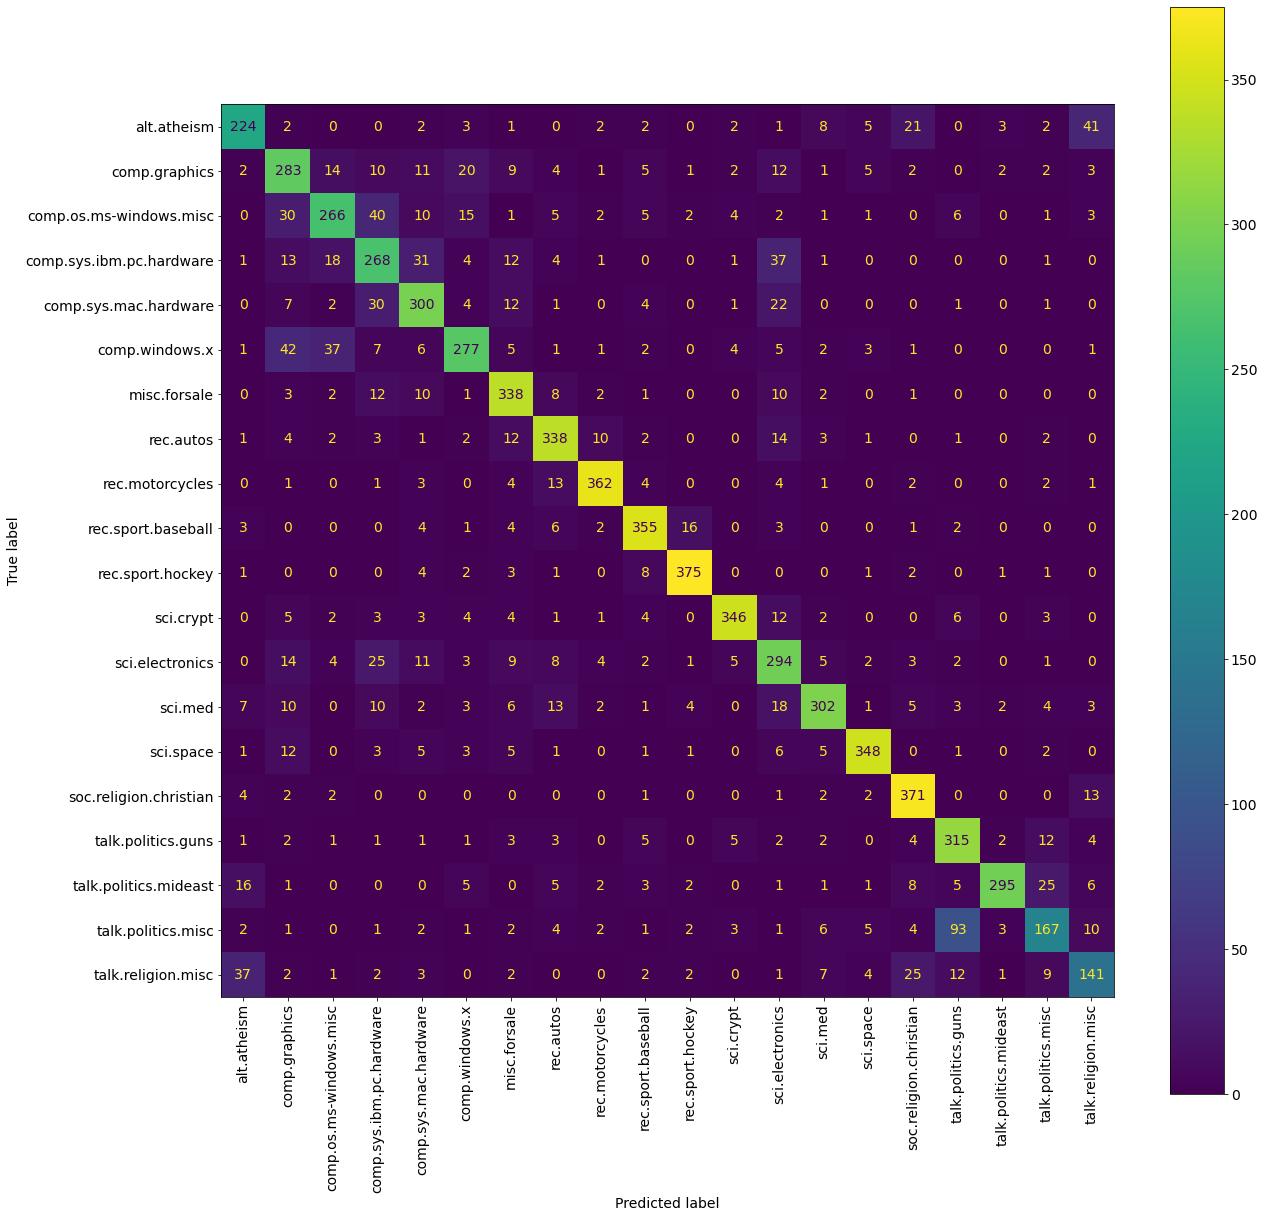

In [24]:
from sklearn.metrics import plot_confusion_matrix

def task_9(normalize=None):
    assert normalize in ('true', 'pred', 'all', None)
    
    values_format = "d" if normalize is None else ".3f"
    
    plt.figure(figsize=(20, 20))
    plot_confusion_matrix(grid, test_mat, test_data.label_name, 
                          normalize=normalize, ax=plt.gca(), 
                          xticks_rotation='vertical', 
                          values_format=values_format)
    
task_9()

/home/eduard/anaconda3/envs/python/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


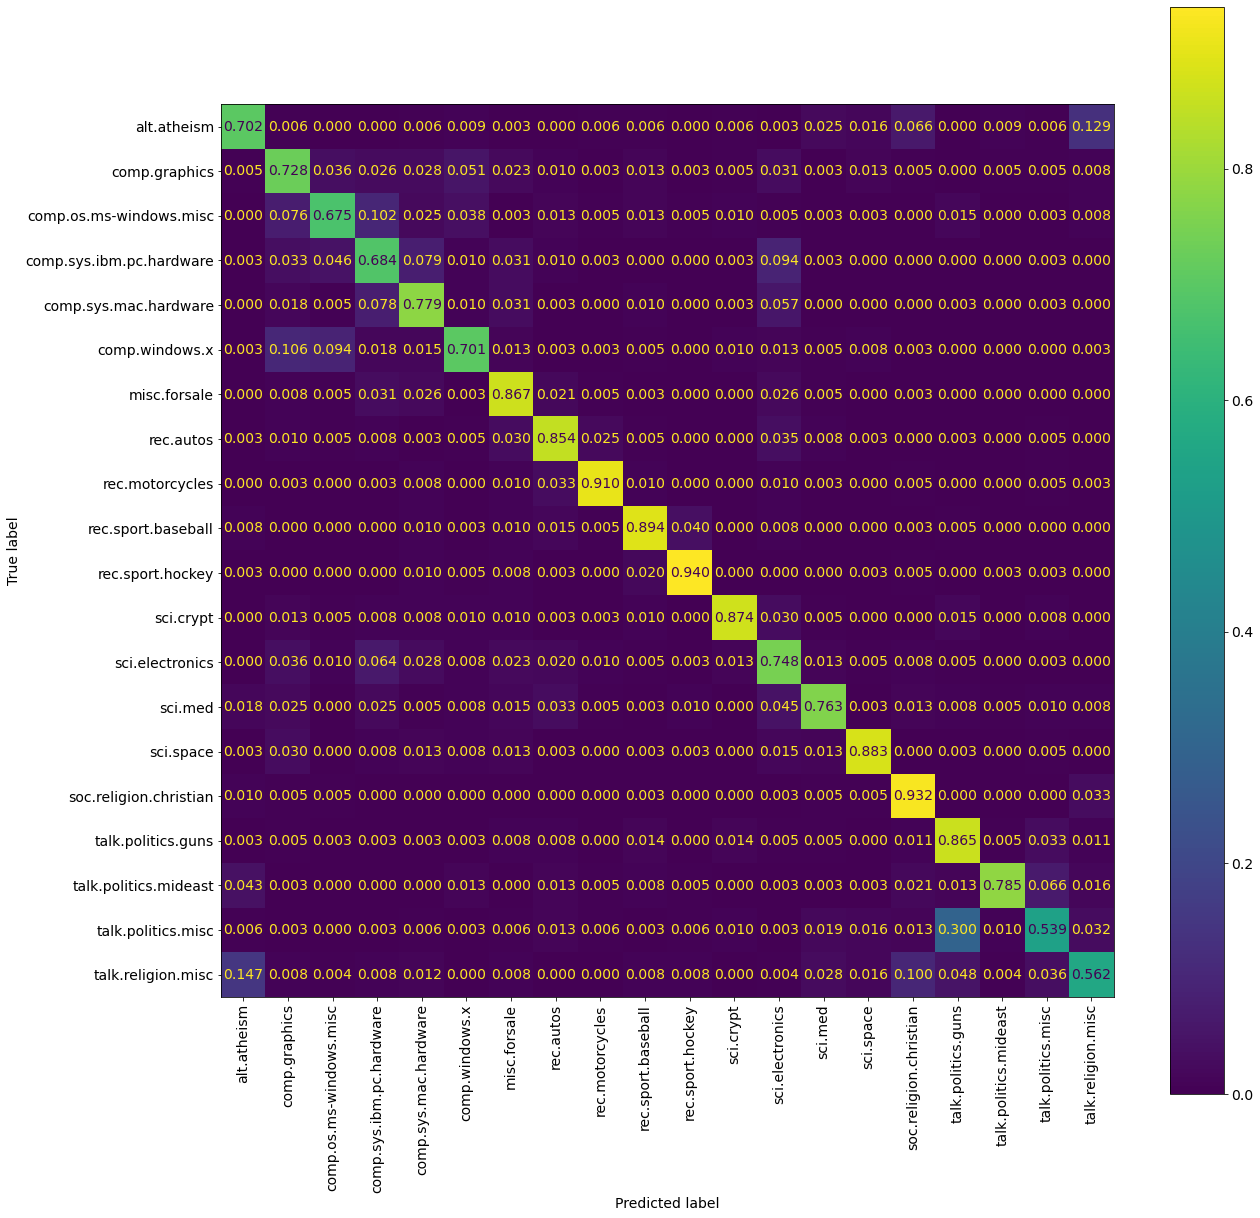

In [25]:
task_9('true')

**Запутываемые классы:**  
`talk.politics.misc` --- `talk.politics.guns`  
`talk.religion.misc` --- `alt.atheism`

__Задание 10 (2.5 балла):__ Установите библиотеку XGBoost и обучите модель градиентного бустинга для решения поставленной задачи классификации. Попробуйте подобрать оптимальную модель, выбрав 2-3 важных параметра обучения. Укажите, какие параметры в большей, а какие - в меньшей степени оказали влияние на итоговое качество модели.

<i>Замечание:<i> `lambda` --- коэффициент L2-регуляризатора

In [120]:
from xgboost import XGBClassifier

def task_10():
    classifier = XGBClassifier(n_estimators=300, random_state=SEED)
    param_grid = {'learning_rate': [0.02, 0.1], 
                  'max_depth': [5, 8], 
                  'lambda': [0.1, 1]}
    
    xgb_grid = GridSearchCV(classifier, param_grid, scoring="accuracy", cv=3)
    xgb_grid.fit(train_mat, train_data.label_name)
    
    return xgb_grid

xgb_grid = task_10()

In [106]:
xgb_preds = xgb_grid.predict(test_mat)

accuracy = round(accuracy_score(test_data.label_name, xgb_preds), 3)
f1_macro = round(f1_score(test_data.label_name, xgb_preds, average="macro"), 3)
f1_micro = round(f1_score(test_data.label_name, xgb_preds, average="micro"), 3)

print("Accuracy =", accuracy)
print("F1-score-macro =", f1_macro)
print("F1-score-micro =", f1_micro)

Accuracy = 0.792
F1-score-macro = 0.788
F1-score-micro = 0.792


In [105]:
params = xgb_grid.cv_results_['params']
scores = xgb_grid.cv_results_['mean_test_score']

print("Best params:", xgb_grid.best_params_)
print()

for param, score in zip(params, scores):
    print(param, "---", round(score, 3))

Best params: {'lambda': 0.1, 'learning_rate': 0.1, 'max_depth': 5}

{'lambda': 0.1, 'learning_rate': 0.05, 'max_depth': 5} --- 0.844
{'lambda': 0.1, 'learning_rate': 0.05, 'max_depth': 7} --- 0.849
{'lambda': 0.1, 'learning_rate': 0.05, 'max_depth': 9} --- 0.847
{'lambda': 0.1, 'learning_rate': 0.1, 'max_depth': 5} --- 0.857
{'lambda': 0.1, 'learning_rate': 0.1, 'max_depth': 7} --- 0.852
{'lambda': 0.1, 'learning_rate': 0.1, 'max_depth': 9} --- 0.846
{'lambda': 0.1, 'learning_rate': 0.2, 'max_depth': 5} --- 0.855
{'lambda': 0.1, 'learning_rate': 0.2, 'max_depth': 7} --- 0.847
{'lambda': 0.1, 'learning_rate': 0.2, 'max_depth': 9} --- 0.843
{'lambda': 1, 'learning_rate': 0.05, 'max_depth': 5} --- 0.837
{'lambda': 1, 'learning_rate': 0.05, 'max_depth': 7} --- 0.839
{'lambda': 1, 'learning_rate': 0.05, 'max_depth': 9} --- 0.837
{'lambda': 1, 'learning_rate': 0.1, 'max_depth': 5} --- 0.85
{'lambda': 1, 'learning_rate': 0.1, 'max_depth': 7} --- 0.844
{'lambda': 1, 'learning_rate': 0.1, 'max_

**Вывод:** Все рассматриваемые параметры оказывают одинаковое модели на качество модели: 
при изменении одного из параметров разница в точности предсказания составляет до 0.01

__Задание 11 (2.5 балла):__ Часто в обработке текстов возникает задача выделения тем, обсуждаемых в них. Одним из способов решения это задачи является кластеризация графа совстречаемостей слов. Для текстов, находящихся в поле `pp_text` постройте словарь "слово" в "слово" в "счетчик совстречаемости", для слова A и B достаточно хранить A -> B -> counter, хранить B -> A -> counter не нужно. Счетчик увеличивается на 1, если пара слов встретилась в одном тексте внутри окна с длиной 10 слов.

In [26]:
from collections import defaultdict


def task_11(corpus, window_size=10):
    cooccurence_graph = dict()
    
    for text in corpus:
        tokens = text.split()
        for i, token in enumerate(tokens):
            if vocabulary.get(token) is None:
                continue
                
            next_tokens = tokens[i+1:i+1+window_size]
            
            for next_token in next_tokens:
                if vocabulary.get(next_token) is None:
                    continue
                    
                key = tuple(sorted([token, next_token]))
                
                if cooccurence_graph.get(key) is None:
                    cooccurence_graph[key] = 1
                else:
                    cooccurence_graph[key] += 1
                    
    return cooccurence_graph

cooccurence_dict = task_11(train_data.pp_text.values)

__Задание 12 (2.5 балла):__ Приняв каждое слово за вершину, а ребра между ними - за наличие совместной встречаемости, постройте граф совстречаемостей. Все ребра равнозначны, ребро добавляется между словами, если значение счетчика совместной встречамости этих слов выше заданного порога T. Примените к получившему графу алгоритм выделения сообществ greedy_modularity_communities из библиотеки NetworkX и напечайте получившиеся вообщества. Можно ли их как-то интерпретировать?

Пробуйте варьировать значение T от 70 до 120 и удалять слишком большие (и потому заведомо бесполезные) сообщества и сообщества из 1 слова.

In [27]:
from networkx import Graph
from networkx.algorithms import community

MIN_COMP_SIZE = 2
MAX_COMP_SIZE = 100

def task_12(cooccur_thr):
    def filter_communities(community):
        return MIN_COMP_SIZE <= len(community) <= MAX_COMP_SIZE
    
    cooccur_graph = Graph()
    cooccur_graph.add_nodes_from(vocabulary.keys())
    
    for key, count in cooccurence_dict.items():
        if count >= cooccur_thr:
            cooccur_graph.add_edge(key[0], key[1])
    
    communities = community.greedy_modularity_communities(cooccur_graph)
    communities = list(filter(filter_communities, communities))
    
    return communities

In [28]:
for cooccur_thr in range(70, 121, 10):
    print("Threshold =", cooccur_thr, end='\n\n')
    
    communities = task_12(cooccur_thr)
    print(*communities[::8], sep='\n', end='\n\n')

Threshold = 70

frozenset({'export', 'voice', 'order', 'theseus', 'oname', 'open', 'unx', 'program', 'screen', 'sas', 'detail', 'post', 'mydisplay', 'section', 'running', 'xvoid', 'contrib', 'send', 'swap', 'entry', 'control', 'phone', 'remark', 'name', 'expo', 'mailing', 'tar', 'directory', 'american', 'output', 'build', 'thanks', 'char', 'files', 'gun', 'upenn', 'processing', 'compass', 'check', 'color', 'file', 'please', 'manager', 'info', 'value', 'null', 'contact', 'tel', 'appreciated', 'list', 'stream', 'note', 'site', 'windows', 'greatly', 'address', 'eof', 'requests', 'window', 'request', 'email', 'xpert', 'drivers', 'lcs', 'image', 'electronic', 'server', 'microsoft', 'anonymous', 'eff', 'sites', 'driver', 'via', 'mail', 'advance', 'available', 'filename', 'main', 'fax', 'ftp', 'int', 'win', 'fprintf', 'display', 'interested', 'respond', 'format', 'sasghm', 'pub'})
frozenset({'fred', 'skndiv', 'mccall', 'mksol', 'dseg', 'monash', 'yoyo', 'pyron', 'rice'})
frozenset({'libxmu', 

**Вывод:** Да, можно. Например, первая компонента связана с программированием, также встречаются компоненты, соответствующие названиям городов и стран (los angeles, united states), известных личностей (jim zisfein) или же простых словосочетаний (window manager, weeks ago, gun control)